<a href="https://colab.research.google.com/github/AKASH4671/AI-Powered-Portfolio-Optimization-and-Risk-Management/blob/main/1_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os

**Define tickers and date range**

In [3]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'JPM', 'GS', 'XOM', 'JNJ', 'NVDA', 'WMT', 'UNH']
start_date = '2019-01-01'
end_date = '2024-12-31'

**Download adjusted close prices**

In [7]:
# Download adjusted close prices (no need for 'Adj Close')
data = yf.download(tickers, start=start_date, end=end_date)[['Close']]
data = data['Close']

/tmp/ipython-input-7-1367185718.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)[['Close']]
[*********************100%***********************]  10 of 10 completed


**Drop missing values**

In [8]:
data.dropna(inplace=True)

**Calculate daily returns**

In [9]:
daily_returns = data.pct_change().dropna()

**Calculate mean returns and covariance matrix**

In [10]:
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

**Save to CSV**

In [12]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#Project Folder Path in Drive
project_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Powered-Portfolio-Optimization-and-Risk-Management/"

In [24]:
os.makedirs(project_path + "data", exist_ok=True)
os.makedirs(project_path + "plots", exist_ok=True)

In [25]:
# Save outputs to Drive
data.to_csv(project_path + "data/stock_data.csv")
daily_returns.to_csv(project_path + "data/daily_returns.csv")
mean_returns.to_csv(project_path + "data/mean_returns.csv")
cov_matrix.to_csv(project_path + "data/cov_matrix.csv")

**Print sample outputs**

In [26]:
# Preview the last 5 rows of price data
print("🔹 Stock Prices (Adjusted Close) — Last 5 Days:")
display(data.tail())

# Preview the last 5 rows of daily returns
print("\n🔹 Daily Returns — Last 5 Days:")
display(daily_returns.tail())

# Show mean returns
print("\n🔹 Mean Daily Returns:")
display(mean_returns)

# Show covariance matrix
print("\n🔹 Covariance Matrix:")
display(cov_matrix)


🔹 Stock Prices (Adjusted Close) — Last 5 Days:


Ticker,AAPL,AMZN,GS,JNJ,JPM,MSFT,NVDA,UNH,WMT,XOM
Date,,,,,,,,,,
2024-12-23,254.655716,225.059998,565.146667,142.891418,234.583115,433.583038,139.647446,500.631378,89.885246,104.396103
2024-12-24,257.578674,229.050003,577.038086,143.461914,238.440506,437.647400,140.197372,500.394104,92.203255,104.494308
2024-12-26,258.396667,227.050003,575.493469,143.196320,239.257263,436.432068,139.907410,505.387177,92.312698,104.582695
2024-12-27,254.974930,223.750000,570.493408,142.675003,237.318726,428.881104,136.987885,504.240234,91.188507,104.572884
2024-12-30,251.593079,221.300003,567.889282,140.992996,235.498260,423.202911,137.467804,502.074921,90.104118,103.865776



🔹 Daily Returns — Last 5 Days:


Ticker,AAPL,AMZN,GS,JNJ,JPM,MSFT,NVDA,UNH,WMT,XOM
Date,,,,,,,,,,
2024-12-23,0.003065,0.000622,0.008267,0.005538,0.003325,-0.003092,0.036897,0.012417,-0.020490,0.004062
2024-12-24,0.011478,0.017729,0.021041,0.003993,0.016444,0.009374,0.003938,-0.000474,0.025789,0.000941
2024-12-26,0.003176,-0.008732,-0.002677,-0.001851,0.003425,-0.002777,-0.002068,0.009978,0.001187,0.000846
2024-12-27,-0.013242,-0.014534,-0.008688,-0.003641,-0.008102,-0.017302,-0.020868,-0.002269,-0.012178,-0.000094
2024-12-30,-0.013263,-0.010950,-0.004565,-0.011789,-0.007671,-0.013240,0.003503,-0.004294,-0.011892,-0.006762



🔹 Mean Daily Returns:


,0
Ticker,
AAPL,0.001450
AMZN,0.000932
GS,0.001092
JNJ,0.000259
JPM,0.000885
MSFT,0.001159
NVDA,0.002991
UNH,0.000716
WMT,0.000863



🔹 Covariance Matrix:


Ticker,AAPL,AMZN,GS,JNJ,JPM,MSFT,NVDA,UNH,WMT,XOM
Ticker,,,,,,,,,,
AAPL,0.000378,0.000247,0.000181,0.000085,0.000155,0.000261,0.000383,0.000140,0.000090,0.000115
AMZN,0.000247,0.000462,0.000153,0.000049,0.000115,0.000268,0.000406,0.000085,0.000087,0.000064
GS,0.000181,0.000153,0.000399,0.000087,0.000318,0.000172,0.000263,0.000157,0.000069,0.000218
JNJ,0.000085,0.000049,0.000087,0.000146,0.000091,0.000082,0.000061,0.000106,0.000062,0.000072
JPM,0.000155,0.000115,0.000318,0.000091,0.000373,0.000150,0.000212,0.000152,0.000065,0.000222
MSFT,0.000261,0.000268,0.000172,0.000082,0.000150,0.000334,0.000401,0.000140,0.000093,0.000094
NVDA,0.000383,0.000406,0.000263,0.000061,0.000212,0.000401,0.001069,0.000168,0.000107,0.000134
UNH,0.000140,0.000085,0.000157,0.000106,0.000152,0.000140,0.000168,0.000337,0.000071,0.000129
WMT,0.000090,0.000087,0.000069,0.000062,0.000065,0.000093,0.000107,0.000071,0.000182,0.000050


**view the variance of each stock**

In [27]:
# Calculate variance directly from daily returns
individual_variances = daily_returns.var()

# Display each stock's variance
print("🔹 Individual Stock Variances:")
display(individual_variances)

# Confirm diagonal values match the covariance matrix diagonal
print("\n🔹 Diagonal of Covariance Matrix (Should match variances):")
diagonal_from_cov_matrix = pd.Series(np.diag(cov_matrix), index=cov_matrix.columns)
display(diagonal_from_cov_matrix)

# Optional: Compare side by side
comparison = pd.DataFrame({
    'Direct Variance': individual_variances,
    'Cov Matrix Diagonal': diagonal_from_cov_matrix
})
print("\n🔹 Comparison: Direct Variance vs Covariance Matrix Diagonal")
display(comparison)


🔹 Individual Stock Variances:


,0
Ticker,
AAPL,0.000378
AMZN,0.000462
GS,0.000399
JNJ,0.000146
JPM,0.000373
MSFT,0.000334
NVDA,0.001069
UNH,0.000337
WMT,0.000182



🔹 Diagonal of Covariance Matrix (Should match variances):


,0
Ticker,
AAPL,0.000378
AMZN,0.000462
GS,0.000399
JNJ,0.000146
JPM,0.000373
MSFT,0.000334
NVDA,0.001069
UNH,0.000337
WMT,0.000182



🔹 Comparison: Direct Variance vs Covariance Matrix Diagonal


,Direct Variance,Cov Matrix Diagonal
Ticker,,
AAPL,0.000378,0.000378
AMZN,0.000462,0.000462
GS,0.000399,0.000399
JNJ,0.000146,0.000146
JPM,0.000373,0.000373
MSFT,0.000334,0.000334
NVDA,0.001069,0.001069
UNH,0.000337,0.000337
WMT,0.000182,0.000182


**Price Trend of All 10 Stocks**

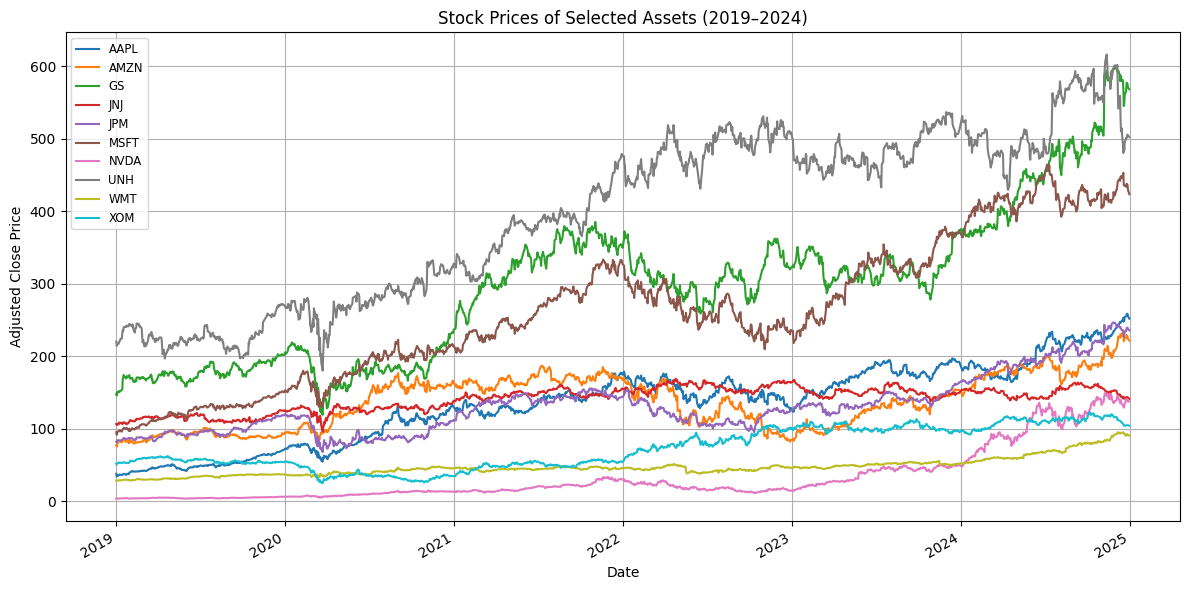

In [28]:
plt.figure(figsize=(12, 6))
data.plot(ax=plt.gca())
plt.title('Stock Prices of Selected Assets (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(project_path + "plots/price_trends.png")
plt.show()


**Histogram of Daily Returns per Stock**

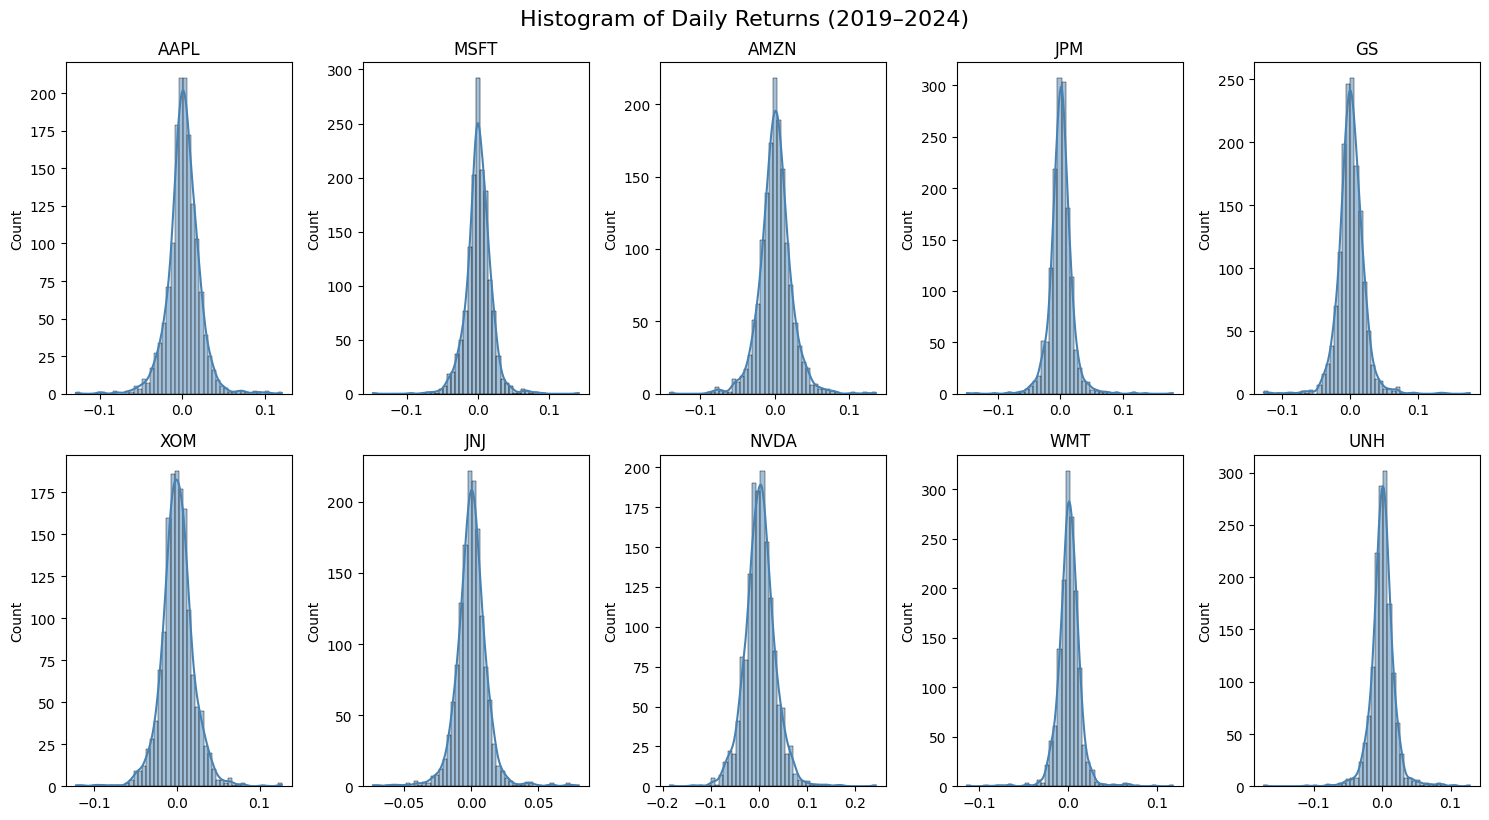

In [29]:
plt.figure(figsize=(15, 8))
for i, ticker in enumerate(tickers):
    plt.subplot(2, 5, i + 1)
    sns.histplot(daily_returns[ticker], bins=50, kde=True, color='steelblue')
    plt.title(ticker)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Histogram of Daily Returns (2019–2024)', fontsize=16, y=1.02)
plt.savefig(project_path + "plots/return_distributions.png", bbox_inches='tight')
plt.show()


**Heatmap of Covariance Matrix**

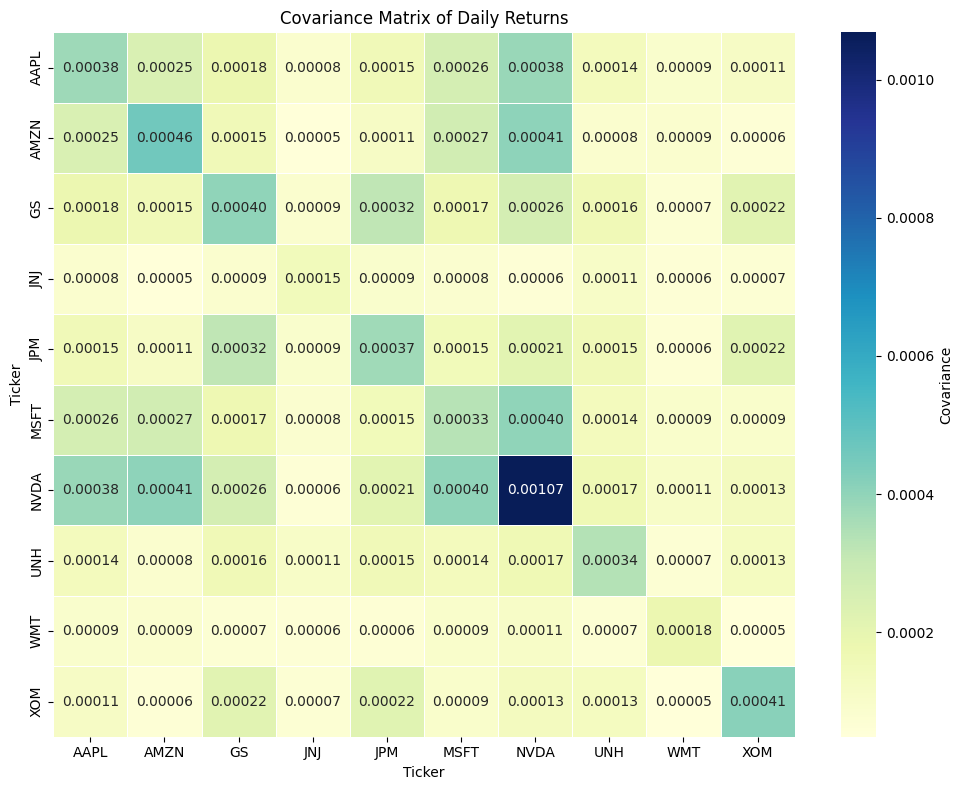

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix,
            annot=True,
            cmap='YlGnBu',
            fmt=".5f",
            linewidths=0.5,
            cbar_kws={'label': 'Covariance'},  # Label the color bar
            vmin=cov_matrix.min().min(),
            vmax=cov_matrix.max().max())

plt.title("Covariance Matrix of Daily Returns")
plt.tight_layout()
plt.savefig(project_path + "plots/covariance_heatmap.png")
plt.show()

**What we See :**

1. The histogram + KDE (blue) shows the actual distribution of returns

2. The red dashed curve is a fitted normal (Gaussian) distribution

**we notice:**

1. Fat tails (blue > red at the extremes)

2. Higher peak (leptokurtosis)

3. Possible skewness

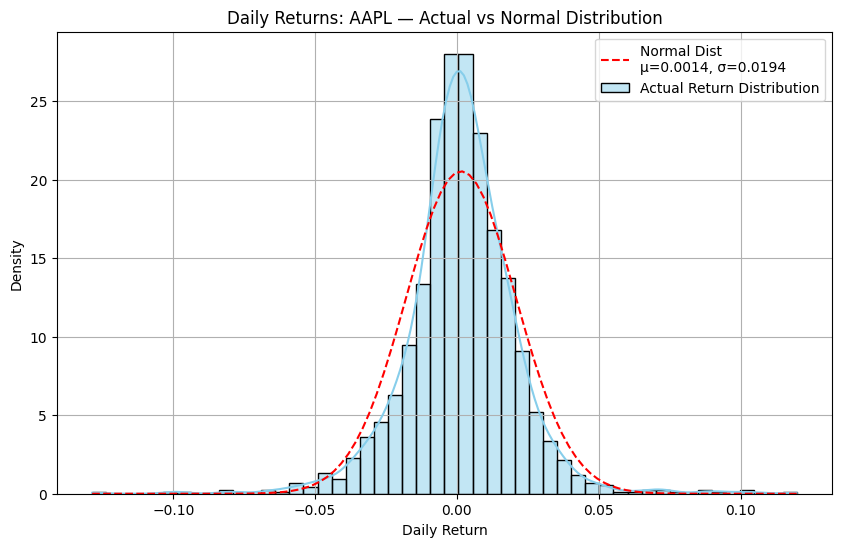

In [31]:
ticker = 'AAPL'  # we can replace this with any stock

# Extract daily returns
returns = daily_returns[ticker]

# Fit a normal distribution
mu, sigma = norm.fit(returns)

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=True, stat='density', color='skyblue', label='Actual Return Distribution')

# Plot the normal distribution curve
x = np.linspace(returns.min(), returns.max(), 100)
normal_pdf = norm.pdf(x, mu, sigma)
plt.plot(x, normal_pdf, 'r--', label=f'Normal Dist\nμ={mu:.4f}, σ={sigma:.4f}')

# Titles and labels
plt.title(f'Daily Returns: {ticker} — Actual vs Normal Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Save and show
plt.savefig(project_path + f"plots/{ticker}_return_vs_normal.png")
plt.show()
